In [1]:
# Step 1: Environment Setup
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("✅ TensorFlow Version:", tf.__version__)


✅ TensorFlow Version: 2.19.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


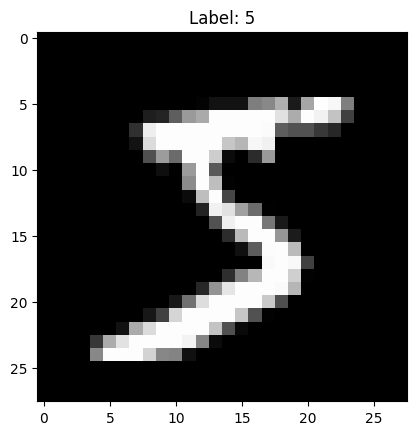

In [2]:
# Step 2: Load Dataset
from tensorflow.keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check the shape of the data
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# Display one example image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [3]:
# Step 3: Preprocess Data

# Normalize image data (0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for the model (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("Training data shape after reshape:", x_train.shape)
print("Testing data shape after reshape:", x_test.shape)

# Check few sample labels
print("Sample labels:", y_train[:10])


Training data shape after reshape: (60000, 28, 28, 1)
Testing data shape after reshape: (10000, 28, 28, 1)
Sample labels: [5 0 4 1 9 2 1 3 1 4]


In [4]:
# Step 4: Build the Model
from tensorflow.keras import layers, models

# Create a Sequential model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0–9
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Step 5: Train the Model

history = model.fit(
    x_train, y_train,
    epochs=5,                # number of training rounds
    batch_size=64,           # how many images per batch
    validation_data=(x_test, y_test)
)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.8744 - loss: 0.4097 - val_accuracy: 0.9799 - val_loss: 0.0657
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.9811 - loss: 0.0576 - val_accuracy: 0.9863 - val_loss: 0.0443
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.9880 - loss: 0.0380 - val_accuracy: 0.9895 - val_loss: 0.0329
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.9912 - loss: 0.0276 - val_accuracy: 0.9890 - val_loss: 0.0337
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.9928 - loss: 0.0217 - val_accuracy: 0.9897 - val_loss: 0.0319


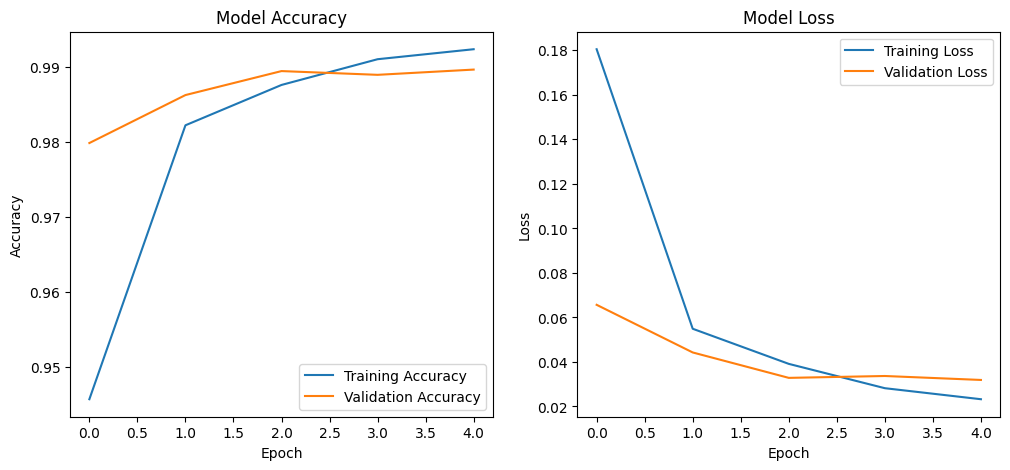

In [6]:
# Step 6: Visualize Training Progress

plt.figure(figsize=(12,5))

# Plot accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


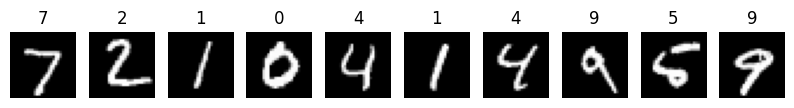

In [7]:
# Display some predictions
predictions = model.predict(x_test)

# Show first 10 test images with predictions
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(np.argmax(predictions[i]))
    plt.axis('off')
plt.show()


In [8]:
# Step 7: Save the Model

# Save the trained model to a file
model.save("mnist_cnn_model.h5")

print("✅ Model saved successfully as mnist_cnn_model.h5")


✅ Model saved successfully as mnist_cnn_model.h5
